In [1]:
import os
from math import ceil
import pandas as pd
import pymc3 as pm
os.chdir('../../util/')
from jags_ydich_xnomssubj_mbinombetaomegakappa import plot_mcmc

**Exercise 9.2. [Purpose: Examine the prior on $\theta_s$ implied by the prior constants at higher levels.]** To sample from the prior in JAGS we just comment out the data, as was explained in Section 8.5. In the program `Jags-Ydich-XnomSsubj-MbinomBetaOmegaKappa.R`, just comment out the line that specifies `z`, like this:

```
dataList = list(
#   z = z ,
   N = N ,
   Nsubj = Nsubj
)
```

Save the program, and run it with the two priors on $\kappa$ discussed in the previous exercise. You may want to change the file name root for the saved graphic files. For both priors, include the graphs of the prior distributions on $\theta_s$ and the differences of $\theta_s$'s such as `theta[1]-theta[28]`. See Figure 9.19.

In [2]:
def plot_priors(shape, rate):
    # Estimate priors
    n_subjects = 28
    parameters = ['omega', 'kappa_minus_two']
    with pm.Model() as model:
        omega = pm.Beta('omega', 1, 1)
        kappa_minus_two = pm.Gamma('kappa_minus_two', shape, rate) 
        kappa = kappa_minus_two + 2

        thetas = pm.Beta('thetas', 
                         alpha = omega * (kappa - 2) + 1, 
                         beta = (1 - omega) * (kappa - 2) + 1, 
                         shape = n_subjects)

        trace = pm.sample_prior_predictive(samples = 50000)
    for i in range(n_subjects): 
        trace['theta_' + str(i)] = trace['thetas'][:, i]
        parameters.append('theta_' + str(i))
    del trace['thetas']
    
    # Adding a varnames property to the trace
    class MyDict(dict):
        def __init__(self, original):
            for k in original.keys():
                self[k] = original[k]
        def __getitem__(self, key):
            return getattr(self, key)
        def __setitem__(self, key, value):
            setattr(self, key, value)

    trace = MyDict(trace)
    trace.varnames = parameters    
    
    # Plotting
    plot_mcmc(trace, 
              pd.read_csv('therapeutic_touch_data.csv'), 
              comp_val = 0.5, 
              diff_id_vec = [0, 13, 27], 
              comp_val_diff = 0)

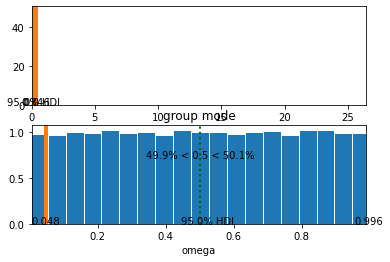

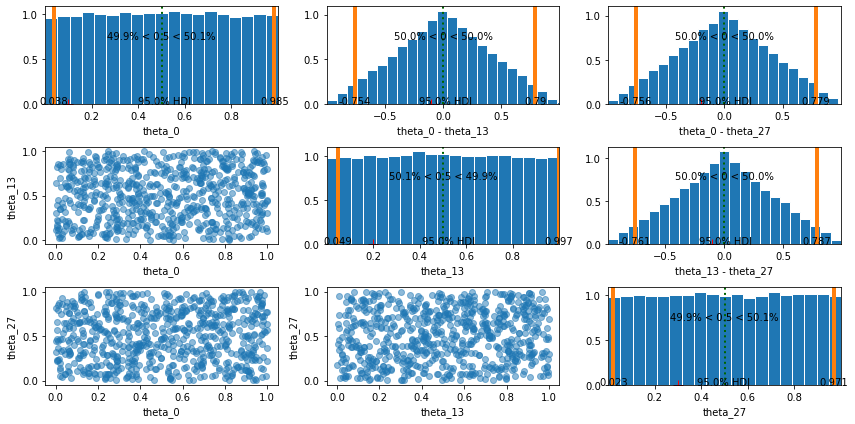

In [3]:
plot_priors(0.01, 0.01) # mean = 1

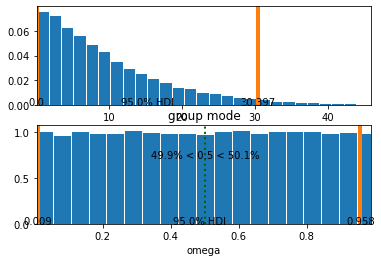

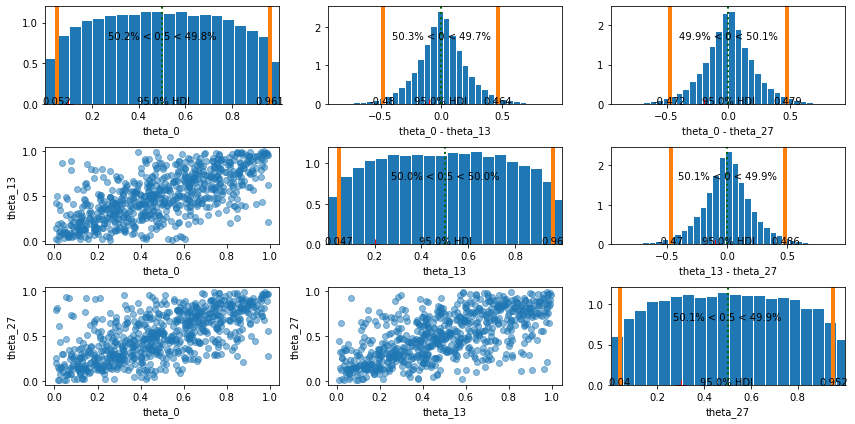

In [4]:
plot_priors(1.105124921972504, 0.10512492197250393) # mode = 1

**(A)** Explain why the implied prior distribution on individual $\theta_s$'s has rounded shoulders (instead of being essentially uniform) when using a prior on $\kappa$ that has a mode of 1 (instead of a mean of 1).

The distribution for mean = 1 has a longer tail. That means that it is more likely to observe a wider range of values of $\kappa$. As a result of that, this distribution is less informative and have less effect on the implied priors of the low-level parameters.

**(B)** Which prior do you think is more appropriate?

Since it was stated that a non-committal prior distribution for $\kappa$ was desirable, we should choose the one for which mean = 1.